In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Dataset .csv")
df.head()


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [2]:
# View all column names
print(df.columns)

# Ensure necessary columns exist
cols = ['Price range', 'Has Online delivery', 'Has Table booking']
for col in cols:
    print(f"\nUnique values in '{col}':\n", df[col].unique())


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Unique values in 'Price range':
 [3 4 2 1]

Unique values in 'Has Online delivery':
 ['No' 'Yes']

Unique values in 'Has Table booking':
 ['Yes' 'No']


In [4]:
# Filter out rows with missing values
df = df.dropna(subset=cols)

# Convert Yes/No to 1/0 for analysis
df['OnlineDeliveryFlag'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['TableBookingFlag'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

# Convert price to int (if needed)
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')


In [5]:
# Group by price range
grouped = df.groupby('Price range')[['OnlineDeliveryFlag', 'TableBookingFlag']].mean()

# Multiply by 100 to convert to %
grouped_percent = grouped * 100

print("📊 Service Availability by Price Range (in %):\n")
print(grouped_percent.round(2))


📊 Service Availability by Price Range (in %):

             OnlineDeliveryFlag  TableBookingFlag
Price range                                      
1                         15.77              0.02
2                         41.31              7.68
3                         29.19             45.74
4                          9.04             46.76


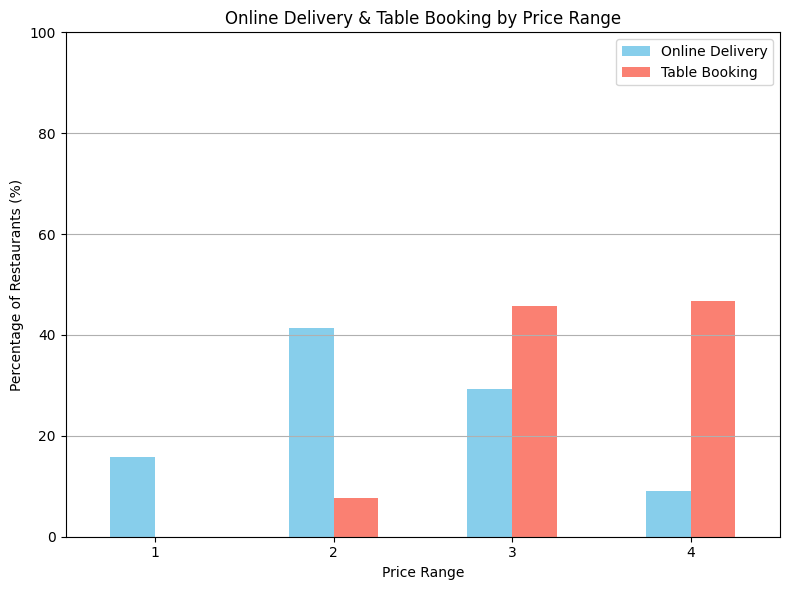

In [6]:
# Bar plot
grouped_percent.plot(kind='bar', figsize=(8,6), color=['skyblue', 'salmon'])
plt.title('Online Delivery & Table Booking by Price Range')
plt.ylabel('Percentage of Restaurants (%)')
plt.xlabel('Price Range')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.legend(['Online Delivery', 'Table Booking'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [7]:
# Find if higher-priced restaurants are more likely to offer services
print("\n🎯 Summary:")
high_price = grouped_percent.idxmax()

print(f"✅ Price Range with MOST Online Delivery: {high_price['OnlineDeliveryFlag']}")
print(f"✅ Price Range with MOST Table Booking: {high_price['TableBookingFlag']}")



🎯 Summary:
✅ Price Range with MOST Online Delivery: 2
✅ Price Range with MOST Table Booking: 4
